# Homework 1

## FINM 35700 - Spring 2023

### UChicago Financial Mathematics

* Yumeng Zhang (12372205)
* ymzhang@uchicago.edu

This homework relies on:

- the US government bonds symbology file `govt_symbology`, 
- the "on-the-run" treasuries data file `govt_on_the_run`,
- the corporate  bonds symbology file `corp_symbology` and
- the market data file `market_prices_eod`.


You can find more details on US treasury instruments in the FINM 37400 Fixed Income course.



In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None

import math
import QuantLib as ql
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
import quandl

# Problem 1: Explore symbology for US treasuries and corporate bonds

## a. Load and explore US government bonds symbology data

Load the `govt_symbology` Excel file into a dataframe. For each government bond issue, calculate its initial term/time-to-maturity in years (based on issue date and maturity date), as well as the current time-to-maturity. Assume a year has 365.25 days, or use QuantLib yearFraction() function.

In [2]:
df_govt_symbology = pd.read_excel('../data/govt_symbology.xlsx',sheet_name='Sheet1')

In [3]:
def calculate_ttm(df):

    dc = ql.Actual360()

    # initial time-to-maturity
    df['term'] = df.apply(lambda x: dc.yearFraction(ql.Date(x['start_date'].day, x['start_date'].month, x['start_date'].year),
                            ql.Date(x['maturity'].day, x['maturity'].month, x['maturity'].year)), axis=1)

    # current time-to-maturity
    today = date.today()
    df['TTM'] = df.apply(lambda x: dc.yearFraction(ql.Date(today.day, today.month, today.year),
                            ql.Date(x['maturity'].day, x['maturity'].month, x['maturity'].year)), axis=1)

    return df

In [4]:
df_govt_symbology = calculate_ttm(df_govt_symbology)

In [5]:
df_govt_symbology[['ticker','figi','isin','trace','start_date','maturity','term','TTM']]

,ticker,figi,isin,trace,start_date,maturity,term,TTM
0,B,BBG01FSQGRT9,US912796CQ02,TSRYS5551439,2023-03-16,2023-09-14,0.505556,0.383333
1,B,BBG01FY3YC89,US912796CR84,TSRYS5554749,2023-03-23,2023-09-21,0.505556,0.402778
2,B,BBG01G14BS72,US912796CS67,TSRYS5557561,2023-03-30,2023-09-28,0.505556,0.422222
3,B,BBG01BYWNTS7,US912796CU14,TSRYS5513508,2022-12-20,2023-04-18,0.330556,-0.030556
4,B,BBG01C3GB4X6,US912796CV96,TSRYS5516304,2022-12-27,2023-04-25,0.330556,-0.011111
...,...,...,...,...,...,...,...,...
377,T,BBG01FQJ5MY4,US91282CGR60,TSRYS5548232,2023-03-15,2026-03-15,3.044444,2.919444
378,T,BBG01G14BV75,US91282CGS44,TSRYS5557563,2023-03-31,2030-03-31,7.102778,7.022222
379,T,BBG01G14BW91,US91282CGT27,TSRYS5557562,2023-03-31,2028-03-31,5.075000,4.994444
380,T,BBG01G14BXX2,US91282CGU99,TSRYS5557560,2023-03-31,2025-03-31,2.030556,1.950000


## b. Historical time series of US treasury coupons 

Plot the time series of coupons for US treasury notes/bonds issued in the last 10 years (indexed by issue date). 
What can you say about the overall level of the coupons in the last 2 years?


In [6]:
def plot_treasury_coupon(df_govt_symbology):

    df_treasury_symbology = df_govt_symbology.loc[df_govt_symbology['ticker'] == 'T']
    df_treasury_symbology = df_treasury_symbology.reset_index(drop = True)
    df_treasury_symbology = df_treasury_symbology[['start_date','maturity','coupon']]

    df_treasury_symbology['yr'] = (df_treasury_symbology['maturity'] - df_treasury_symbology['start_date']) / pd.Timedelta(days=365)
    df_treasury_symbology['yr'] = df_treasury_symbology['yr'].round()

    df_corp_2 = df_treasury_symbology.loc[df_treasury_symbology['yr'] == 2].sort_values(by=['start_date']).reset_index(drop=True)
    df_corp_3 = df_treasury_symbology.loc[df_treasury_symbology['yr'] == 3].sort_values(by=['start_date']).reset_index(drop=True)
    df_corp_5 = df_treasury_symbology.loc[df_treasury_symbology['yr'] == 5].sort_values(by=['start_date']).reset_index(drop=True)
    df_corp_7 = df_treasury_symbology.loc[df_treasury_symbology['yr'] == 7].sort_values(by=['start_date']).reset_index(drop=True)
    df_corp_10 = df_treasury_symbology.loc[df_treasury_symbology['yr'] == 10].sort_values(by=['start_date']).reset_index(drop=True)
    df_corp_20 = df_treasury_symbology.loc[df_treasury_symbology['yr'] == 20].sort_values(by=['start_date']).reset_index(drop=True)
    df_corp_30 = df_treasury_symbology.loc[df_treasury_symbology['yr'] == 30].sort_values(by=['start_date']).reset_index(drop=True)

    fig, ax = plt.subplots(figsize=(20, 8))
    ax.plot(df_corp_2['start_date'], df_corp_2['coupon'], '-', label='2 YR')
    ax.plot(df_corp_3['start_date'], df_corp_3['coupon'], '-', label='3 YR')
    ax.plot(df_corp_5['start_date'], df_corp_5['coupon'], '-', label='5 YR')
    ax.plot(df_corp_7['start_date'], df_corp_7['coupon'], '-', label='7 YR')
    ax.plot(df_corp_10['start_date'], df_corp_10['coupon'], '-', label='10 YR')
    ax.plot(df_corp_20['start_date'], df_corp_20['coupon'], '-', label='20 YR')
    ax.plot(df_corp_30['start_date'], df_corp_30['coupon'], '-', label='30 YR')

    ax.set_title('US Treasury Bond Coupons')
    ax.set_xlabel('Issue Date')
    ax.set_ylabel('Coupon')

    ax.legend()
    plt.grid(True)

    plt.show();

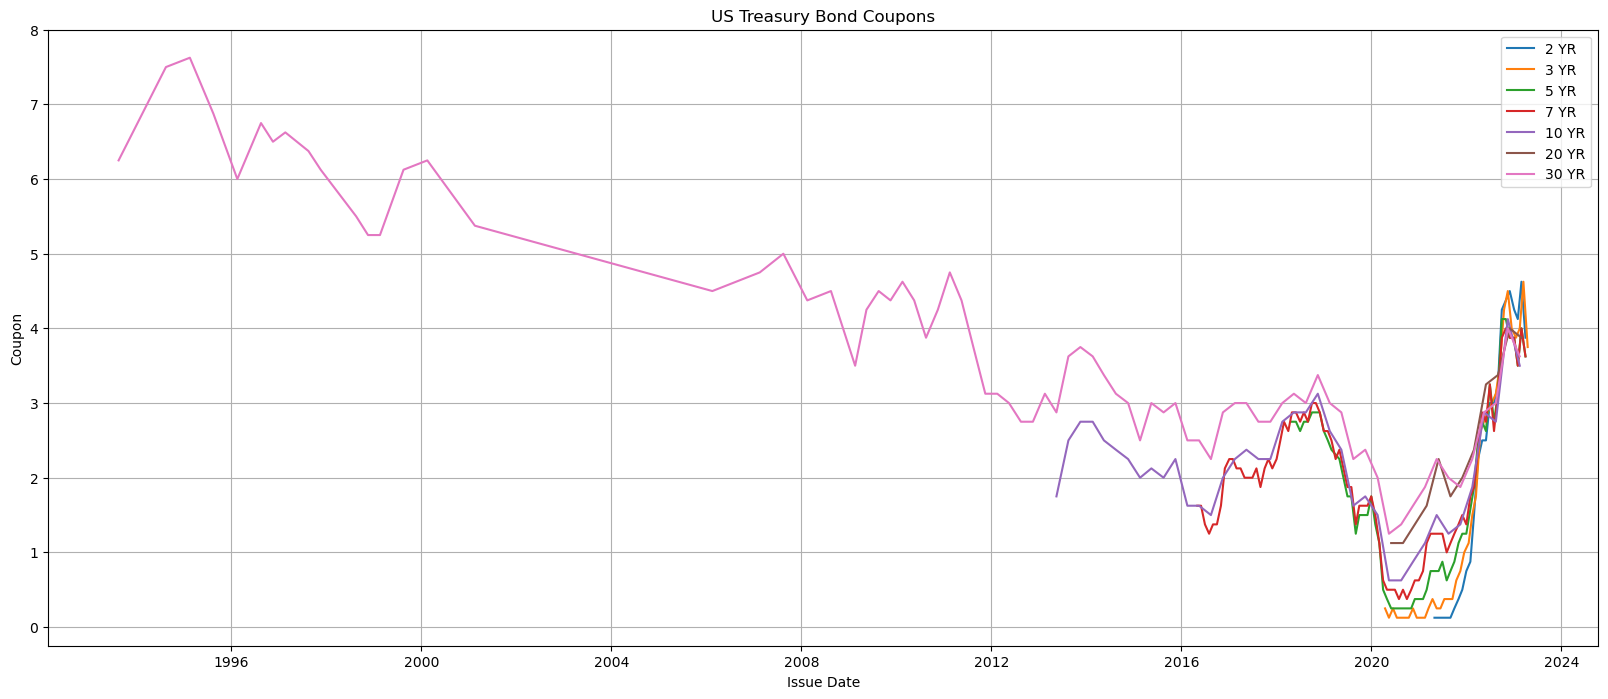

In [7]:
plot_treasury_coupon(df_govt_symbology)

I also used Quandl to get US treasury coupon data just for comparison.

In [8]:
quandl.ApiConfig.api_key = "qUL_zooxYcHueGAiB-D-"

def plot_treasury_coupon2():

    end_date = pd.Timestamp.today()
    start_date = end_date - pd.DateOffset(years=10)

    df = quandl.get("USTREASURY/YIELD", start_date=start_date, end_date=end_date)

    df = df[df.index.year >= end_date.year-10]
    df = df[df.columns[df.columns.str.contains('YR')]]

    plt.figure(figsize=(20, 8))
    for col in df.columns:
        plt.plot(df.index, df[col], label=col)

    plt.title('US Treasury Bond Coupons (Using Quandl)')
    plt.xlabel('Issue Date')
    plt.ylabel('Coupon')
    plt.legend()

    # plt.gca().set_facecolor('lightgray')
    plt.grid(True)

    plt.show()

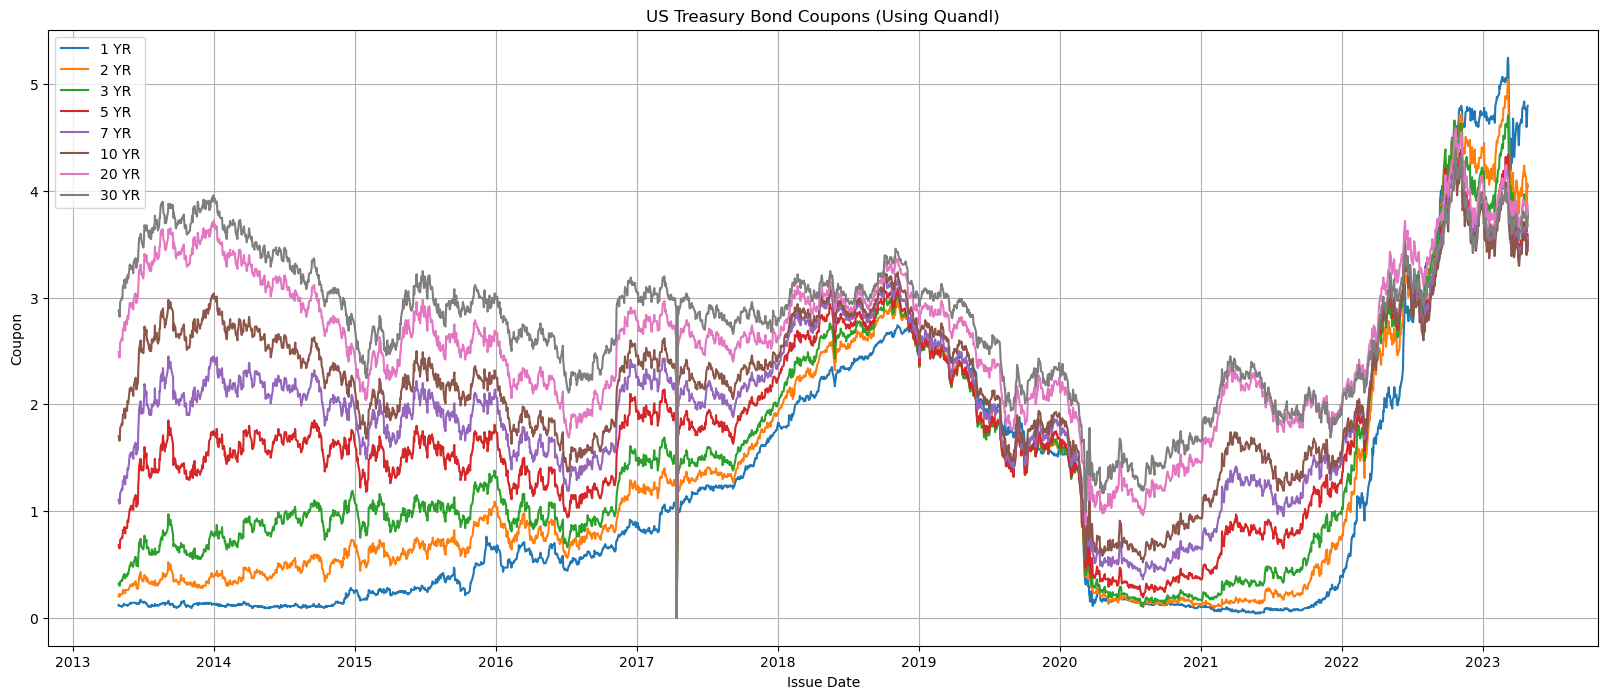

In [9]:
plot_treasury_coupon2()

Comparing with last ten years, coupons for US treasury notes/bonds were on the increase in the last two years. There are several factors that could potentially contribute to an increase in the overall level of coupons like changes in inflation expectations and monetary policy. The Federal Reserve has been gradually increasing interest rates in recent years, which could lead to an increase in the overall level of coupons.

## c. Load the on-the-run US treasuries

Load the `govt_on_the_run` Excel file into a dataframe. Select the current on-the-run 2Y, 3Y, 5Y, 7Y, 10Y, 20Y and 30Y issues (off-the-run issues have the B & C suffix). Create a separate symbology dataframe for on-the-run treasuries only, to be used later on for the on-the-run government yield curve bootstrapping.

In [10]:
df_govt_on_the_run = pd.read_excel('../data/govt_on_the_run.xlsx', sheet_name='Sheet1')
df_govt_on_the_run

,ticker,date,isin,figi
0,GT10 Govt,2023-04-14,US91282CGM73,BBG01DVKBC66
1,GT10B Govt,2023-04-14,US91282CFV81,BBG01BC373F4
2,GT10C Govt,2023-04-14,US91282CFF32,BBG01920ZBH5
3,GT2 Govt,2023-04-14,US91282CGU99,BBG01G14BXX2
4,GT20 Govt,2023-04-14,US912810TQ13,BBG01F6N6GN1
5,GT20B Govt,2023-04-14,US912810TM09,BBG01BGVXMB1
6,GT20C Govt,2023-04-14,US912810TK43,BBG01958YJ98
7,GT2B Govt,2023-04-14,US91282CGN56,BBG01FC880R6
8,GT2C Govt,2023-04-14,US91282CGG06,BBG01CGJ5TJ4
9,GT3 Govt,2023-04-14,US91282CGV72,BBG01G5ZMM43


In [11]:
def get_on_the_run_treasury(df_govt_on_the_run):

    mask = ~df_govt_on_the_run['ticker'].str.contains('B Govt|C Govt')
    df_govt_current_run = df_govt_on_the_run[mask].reset_index(drop=True)

    return df_govt_current_run

In [12]:
df_govt_current_run = get_on_the_run_treasury(df_govt_on_the_run)
df_govt_current_run

,ticker,date,isin,figi
0,GT10 Govt,2023-04-14,US91282CGM73,BBG01DVKBC66
1,GT2 Govt,2023-04-14,US91282CGU99,BBG01G14BXX2
2,GT20 Govt,2023-04-14,US912810TQ13,BBG01F6N6GN1
3,GT3 Govt,2023-04-14,US91282CGV72,BBG01G5ZMM43
4,GT30 Govt,2023-04-14,US912810TN81,BBG01DVKBH56
5,GT5 Govt,2023-04-14,US91282CGT27,BBG01G14BW91
6,GT7 Govt,2023-04-14,US91282CGS44,BBG01G14BV75


## d. Load and explore US corporate bonds symbology data

Load the `corp_symbology` Excel file into a dataframe. 

Create a new (filtered) dataframe for 
* bullet/non-callable (mty_typ="AT MATURITY"), 
* senior unsecured (rank = "Sr Unsecured"),
* fixed coupon (cpn_type="FIXED")

bonds only, with following columns:



| ticker | figi | security | name | coupon | start_date | maturity | term | TTM |
|----------|-------|-------------|-----|----------|---------|---------|---------|---------|

where 
* `term` refers to the initial term/time-to-maturity in years
* `TTM` refers to the current time-to-maturity in years

Create a separate dataframe for VZ issuer only.

In [13]:
def filter_bond(df_corp_symbology_):

    df_corp_symbology = df_corp_symbology_.loc[df_corp_symbology_['mty_typ'] == 'AT MATURITY']
    df_corp_symbology = df_corp_symbology.loc[df_corp_symbology['rank'] == 'Sr Unsecured']
    df_corp_symbology = df_corp_symbology.loc[df_corp_symbology['cpn_type'] == 'FIXED']
    df_corp_symbology = df_corp_symbology.reset_index(drop=True)

    df_corp_symbology = df_corp_symbology[['ticker','figi','security','name','coupon','start_date','maturity']]
    df_corp_symbology = calculate_ttm(df_corp_symbology)

    return df_corp_symbology

In [14]:
df_corp_symbology_ = pd.read_excel('../data/corp_symbology.xlsx', sheet_name='Sheet1')

df_corp_symbology = filter_bond(df_corp_symbology_)
df_corp_symbology

,ticker,figi,security,name,coupon,start_date,maturity,term,TTM
0,DIS,BBG00QNKP8R8,DIS 6.55 03/15/33,WALT DISNEY COMPANY/THE,6.550,2019-11-22,2033-03-15,13.505556,10.022222
1,DIS,BBG00QNKR4J4,DIS 6.2 12/15/34,WALT DISNEY COMPANY/THE,6.200,2019-11-22,2034-12-15,15.283333,11.800000
2,DIS,BBG00QNKRV04,DIS 6.4 12/15/35,WALT DISNEY COMPANY/THE,6.400,2019-11-22,2035-12-15,16.297222,12.813889
3,DIS,BBG00QNKSCY8,DIS 6.15 03/01/37,WALT DISNEY COMPANY/THE,6.150,2019-11-22,2037-03-01,17.525000,14.041667
4,DIS,BBG00QNKSBB5,DIS 6.65 11/15/37,WALT DISNEY COMPANY/THE,6.650,2019-11-22,2037-11-15,18.244444,14.761111
...,...,...,...,...,...,...,...,...,...
83,VZ,BBG00HC11V79,VZ 4 1/2 08/10/33,VERIZON COMMUNICATIONS,4.500,2017-08-10,2033-08-10,16.233333,10.433333
84,VZ,BBG00JKZK9K4,VZ 3.376 02/15/25,VERIZON COMMUNICATIONS,3.376,2018-01-19,2025-02-15,7.177778,1.827778
85,VZ,BBG00M1BQWX0,VZ 4.329 09/21/28,VERIZON COMMUNICATIONS,4.329,2018-10-22,2028-09-21,10.061111,5.477778
86,VZ,BBG00ZLKTDJ4,VZ 0 3/4 03/22/24,VERIZON COMMUNICATIONS,0.750,2021-03-22,2024-03-22,3.044444,0.911111


In [15]:
df_corp_symbology_vz = df_corp_symbology.loc[df_corp_symbology['ticker'] == 'VZ']
df_corp_symbology_vz = df_corp_symbology_vz.reset_index(drop=True)

df_corp_symbology_vz

,ticker,figi,security,name,coupon,start_date,maturity,term,TTM
0,VZ,BBG00000BHR9,VZ 6 1/4 04/01/37,VERIZON COMMUNICATIONS,6.250,2007-04-03,2037-04-01,30.433333,14.127778
1,VZ,BBG0000M1DD6,VZ 6.4 02/15/38,VERIZON COMMUNICATIONS,6.400,2008-02-12,2038-02-15,30.447222,15.016667
2,VZ,BBG0027BCJ08,VZ 4 3/4 11/01/41,VERIZON COMMUNICATIONS,4.750,2011-11-03,2041-11-01,30.433333,18.780556
3,VZ,BBG00580D503,VZ 6.4 09/15/33,VERIZON COMMUNICATIONS,6.400,2013-09-18,2033-09-15,20.283333,10.533333
4,VZ,BBG00580DD79,VZ 6.55 09/15/43,VERIZON COMMUNICATIONS,6.550,2013-09-18,2043-09-15,30.427778,20.677778
5,VZ,BBG0083CP3G1,VZ 4.862 08/21/46,VERIZON COMMUNICATIONS,4.862,2015-03-11,2046-08-21,31.905556,23.652778
6,VZ,BBG0083CP816,VZ 5.012 08/21/54,VERIZON COMMUNICATIONS,5.012,2015-03-11,2054-08-21,40.022222,31.769444
7,VZ,BBG009PNV1G8,VZ 4.272 01/15/36,VERIZON COMMUNICATIONS,4.272,2015-08-20,2036-01-15,20.702778,12.900000
8,VZ,BBG009PNW3Z2,VZ 4.522 09/15/48,VERIZON COMMUNICATIONS,4.522,2015-08-20,2048-09-15,33.555556,25.752778
9,VZ,BBG009PNW578,VZ 4.672 03/15/55,VERIZON COMMUNICATIONS,4.672,2015-08-20,2055-03-15,40.144444,32.341667


# Problem 2: Explore EOD market prices and yields

## a. Load and explore treasury market prices and yields

Load the `market_prices_eod` Excel file into a dataframe. It provides market data for US treasuries and corporate bonds of 2023-04-14.

Join the treasuries symbology dataframe with the market data, to add the following columns:


| date | bid | ask | mid | bid_yield | ask_yield | mid_yield | term | TTM |
|----------|-------|-------------|-----|----------|---------|---------|---------|---------|

Plot a graph/scatter plot of treasury mid yields by TTM.


In [16]:
df_market = pd.read_excel('../data/market_prices_eod.xlsx', sheet_name='Sheet1')
df_market['mid_yield'] = (df_market['bid_yield'] + df_market['ask_yield'])/2
df_market

,date,class,ticker,isin,figi,bid,ask,mid_clean,mid_dirty,bid_yield,ask_yield,mid_yield
0,2023-04-14,Corp,DIS,US254687CZ75,BBG00QNKJ092,98.6780,98.8480,98.7630,99.1020,4.679,4.551,4.6150
1,2023-04-14,Corp,DIS,US254687DD54,BBG00QNKPCL5,98.4540,98.8210,98.6370,98.6680,4.361,4.203,4.2820
2,2023-04-14,Corp,DIS,US254687DK97,BBG00QNKGJP6,97.0900,97.3690,97.2300,98.6640,4.260,4.174,4.2170
3,2023-04-14,Corp,DIS,US254687DV52,BBG00QNKP8R8,115.1630,115.9840,115.5740,116.1740,4.624,4.529,4.5765
4,2023-04-14,Corp,DIS,US254687DZ66,BBG00QNKR4J4,112.9390,113.5860,113.2620,115.3800,4.742,4.674,4.7080
...,...,...,...,...,...,...,...,...,...,...,...,...
592,2023-04-14,Govt,T,US91282CGR60,BBG01FQJ5MY4,102.1250,102.1563,102.1406,102.5547,3.845,3.834,3.8395
593,2023-04-14,Govt,T,US91282CGS44,BBG01G14BV75,100.3750,100.4375,100.4063,100.5742,3.563,3.553,3.5580
594,2023-04-14,Govt,T,US91282CGT27,BBG01G14BW91,100.0703,100.0859,100.0781,100.2461,3.609,3.606,3.6075
595,2023-04-14,Govt,T,US91282CGU99,BBG01G14BXX2,99.5703,99.5820,99.5762,99.7559,4.105,4.099,4.1020


In [36]:
df_govt_symbology

,ticker,class,figi,isin,trace,security,name,type,coupon,cpn_type,...,cpn_freq,days_settle,start_date,cpn_first,acc_first,maturity,country,currency,term,TTM
0,B,Govt,BBG01FSQGRT9,US912796CQ02,TSRYS5551439,B 09/14/23,TREASURY BILL,US GOVERNMENT,0.000,ZERO,...,NaN,1,2023-03-16,NaT,NaT,2023-09-14,US,USD,0.505556,0.383333
1,B,Govt,BBG01FY3YC89,US912796CR84,TSRYS5554749,B 09/21/23,TREASURY BILL,US GOVERNMENT,0.000,ZERO,...,NaN,1,2023-03-23,NaT,NaT,2023-09-21,US,USD,0.505556,0.402778
2,B,Govt,BBG01G14BS72,US912796CS67,TSRYS5557561,B 09/28/23,TREASURY BILL,US GOVERNMENT,0.000,ZERO,...,NaN,1,2023-03-30,NaT,NaT,2023-09-28,US,USD,0.505556,0.422222
3,B,Govt,BBG01BYWNTS7,US912796CU14,TSRYS5513508,B 04/18/23,TREASURY BILL,US GOVERNMENT,0.000,ZERO,...,NaN,1,2022-12-20,NaT,NaT,2023-04-18,US,USD,0.330556,-0.030556
4,B,Govt,BBG01C3GB4X6,US912796CV96,TSRYS5516304,B 04/25/23,TREASURY BILL,US GOVERNMENT,0.000,ZERO,...,NaN,1,2022-12-27,NaT,NaT,2023-04-25,US,USD,0.330556,-0.011111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,T,Govt,BBG01FQJ5MY4,US91282CGR60,TSRYS5548232,T 4 5/8 03/15/26,US TREASURY N/B,US GOVERNMENT,4.625,FIXED,...,2.0,1,2023-03-15,2023-09-15,2023-03-15,2026-03-15,US,USD,3.044444,2.919444
378,T,Govt,BBG01G14BV75,US91282CGS44,TSRYS5557563,T 3 5/8 03/31/30,US TREASURY N/B,US GOVERNMENT,3.625,FIXED,...,2.0,1,2023-03-31,2023-09-30,2023-03-31,2030-03-31,US,USD,7.102778,7.022222
379,T,Govt,BBG01G14BW91,US91282CGT27,TSRYS5557562,T 3 5/8 03/31/28,US TREASURY N/B,US GOVERNMENT,3.625,FIXED,...,2.0,1,2023-03-31,2023-09-30,2023-03-31,2028-03-31,US,USD,5.075000,4.994444
380,T,Govt,BBG01G14BXX2,US91282CGU99,TSRYS5557560,T 3 7/8 03/31/25,US TREASURY N/B,US GOVERNMENT,3.875,FIXED,...,2.0,1,2023-03-31,2023-09-30,2023-03-31,2025-03-31,US,USD,2.030556,1.950000


In [37]:
df_treasury = pd.merge(df_govt_symbology, df_market,  how='left', left_on=['isin','figi'], right_on = ['isin','figi']).dropna()
df_treasury = df_treasury[['date','bid','ask','mid_clean','bid_yield','ask_yield','mid_yield','term','TTM']]
df_treasury = df_treasury.rename(columns={'mid_clean': 'mid'})

df_treasury = df_treasury.reset_index(drop=True)
df_treasury

,date,bid,ask,mid,bid_yield,ask_yield,mid_yield,term,TTM
0,2023-04-14,100.4375,100.8750,100.6563,4.858,3.542,4.2000,30.433333,0.300000
1,2023-04-14,104.7695,105.2148,104.9922,4.336,4.051,4.1935,30.694444,1.572222
2,2023-04-14,105.9258,106.3477,106.1367,4.224,3.992,4.1080,30.438889,1.827778
3,2023-04-14,106.2578,106.9297,106.5938,4.032,3.740,3.8860,30.438889,2.330556
4,2023-04-14,105.4453,106.0547,105.7500,3.946,3.725,3.8355,30.438889,2.841667
...,...,...,...,...,...,...,...,...,...
327,2023-04-14,102.1250,102.1563,102.1406,3.845,3.834,3.8395,3.044444,2.919444
328,2023-04-14,100.3750,100.4375,100.4063,3.563,3.553,3.5580,7.102778,7.022222
329,2023-04-14,100.0703,100.0859,100.0781,3.609,3.606,3.6075,5.075000,4.994444
330,2023-04-14,99.5703,99.5820,99.5762,4.105,4.099,4.1020,2.030556,1.950000


In [18]:
def plot_mid_yield_ttm(df, title, plot_type):

    # df.plot.scatter(x='TTM', y='mid_yield',figsize=(20, 8))

    # plt.title(title)
    # plt.xlabel('TTM')
    # plt.ylabel('Treasury Mid Yield')

    # plt.gca().set_facecolor('lightgray')

    df_plot = df.sort_values(by=['TTM'])

    fig, ax = plt.subplots(figsize=(20, 8))
    ax.plot(df_plot['TTM'], df_plot['mid_yield'], plot_type)

    ax.set_title(title)
    ax.set_xlabel('TTM')
    ax.set_ylabel('Mid Yield')
    plt.grid(True)

    plt.show();

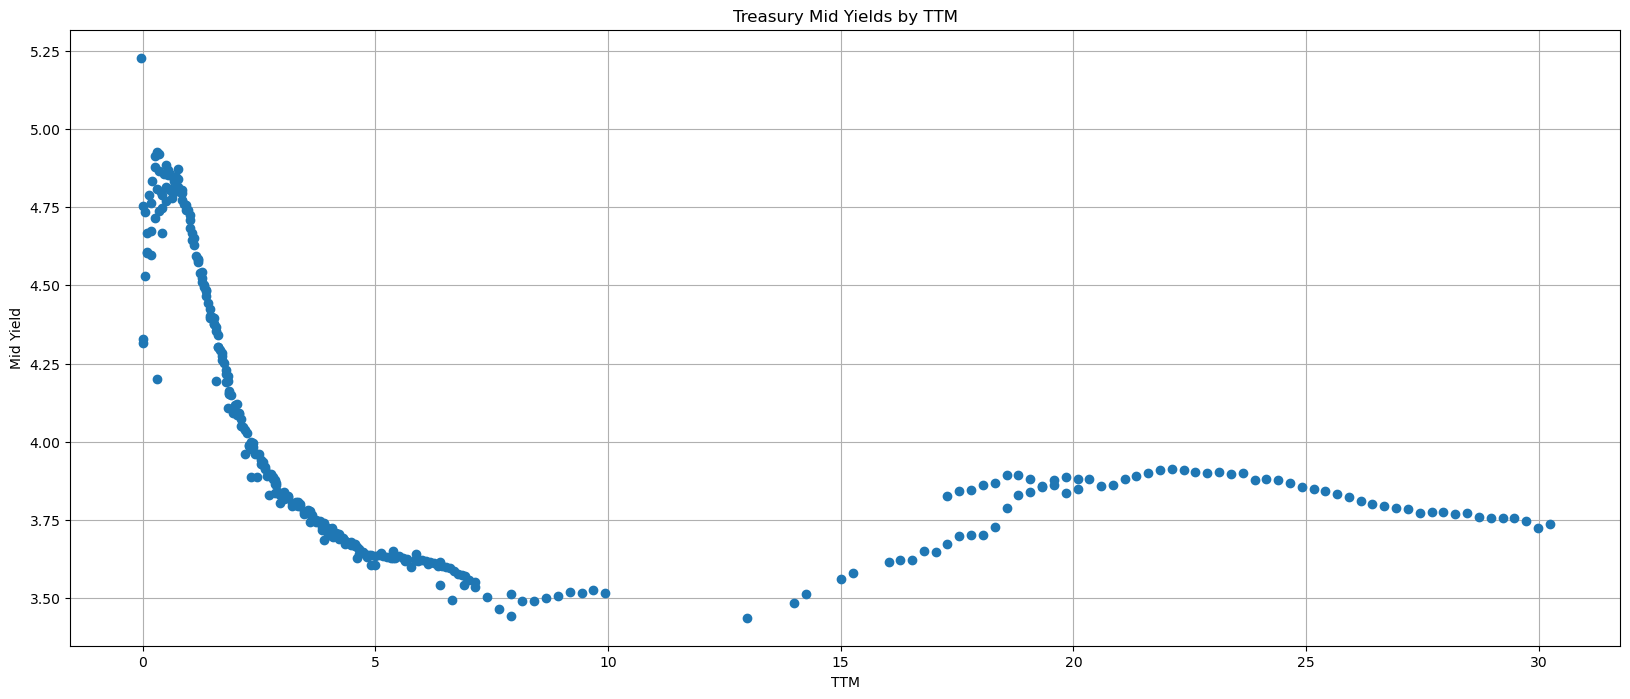

In [19]:
plot_mid_yield_ttm(df_treasury, title = "Treasury Mid Yields by TTM", plot_type = "o")

## b. Explore on-the-run treasuries only
Create a separate joint dataframe for on-the-run treasuries only.

Plot a graph/scatter plot of on-the-run treasury mid yields by TTM.

In [20]:
def get_on_the_run_treasury2(df_govt_symbology, df_govt_current_run):

    df_treasury_run = pd.merge(df_govt_symbology, df_govt_current_run, how='left', left_on=['isin','figi'], right_on = ['isin','figi']).dropna()
    df_treasury_run = pd.merge(df_treasury_run, df_market, how='left', left_on=['isin','figi'], right_on = ['isin','figi']).dropna()

    df_treasury_run = df_treasury_run.rename(columns={'mid_clean': 'mid','date_x':'date'})
    df_treasury_run = df_treasury_run[['date','bid','ask','mid','bid_yield','ask_yield','mid_yield','term','TTM']]

    return df_treasury_run

In [21]:
df_treasury_run = get_on_the_run_treasury2(df_govt_symbology, df_govt_current_run)
df_treasury_run

,date,bid,ask,mid,bid_yield,ask_yield,mid_yield,term,TTM
0,2023-04-14,97.9531,98.0313,97.9922,3.739,3.735,3.7370,30.438889,30.236111
1,2023-04-14,100.2969,100.3750,100.3359,3.853,3.847,3.8500,20.255556,20.088889
2,2023-04-14,99.8438,99.8906,99.8672,3.519,3.513,3.5160,10.147222,9.944444
3,2023-04-14,100.3750,100.4375,100.4063,3.563,3.553,3.5580,7.102778,7.022222
4,2023-04-14,100.0703,100.0859,100.0781,3.609,3.606,3.6075,5.075000,4.994444
5,2023-04-14,99.5703,99.5820,99.5762,4.105,4.099,4.1020,2.030556,1.950000
6,2023-04-14,99.7578,99.7734,99.7656,3.836,3.831,3.8335,3.038889,3.005556


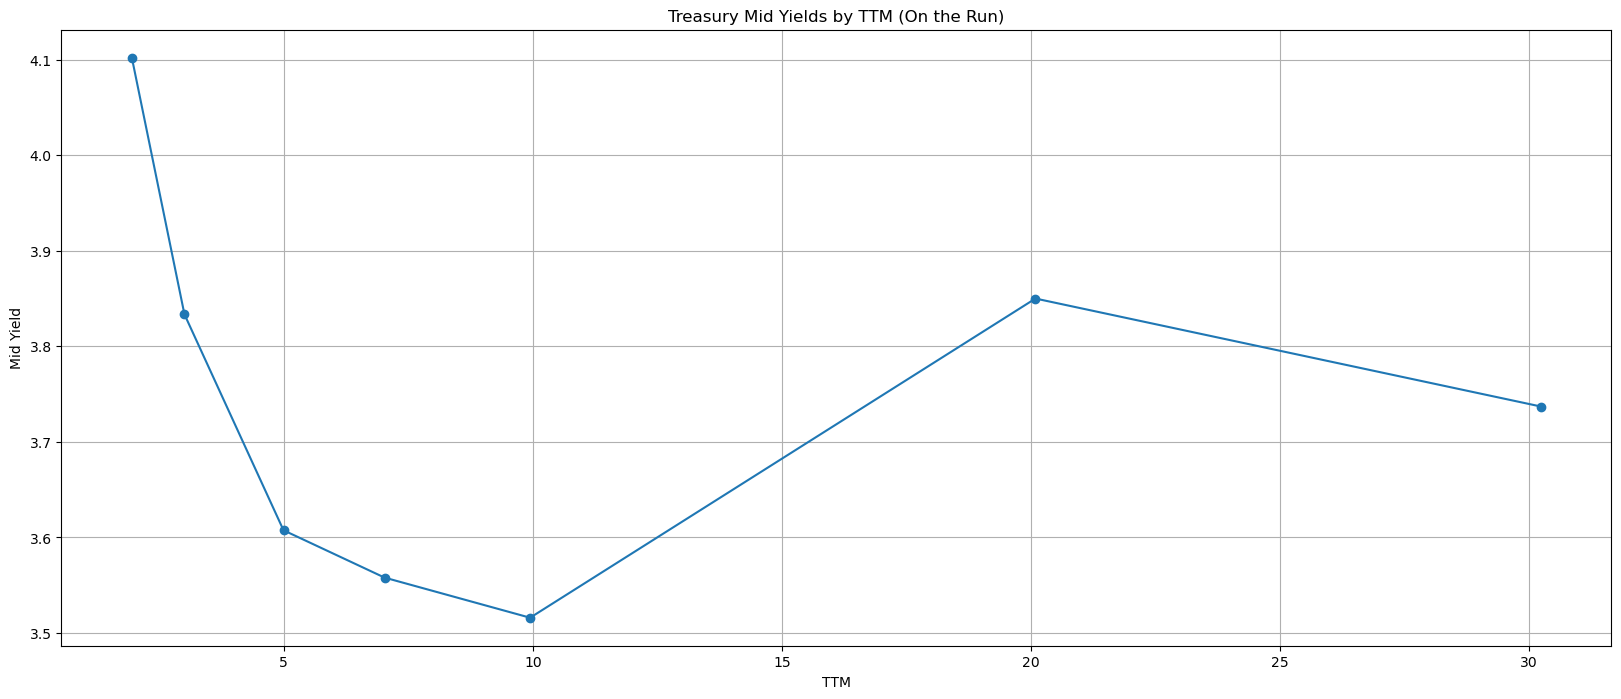

In [22]:
plot_mid_yield_ttm(df_treasury_run, title = "Treasury Mid Yields by TTM (On the Run)", plot_type = "o-")

## c. Load and explore corporate bond market prices and yields

Join the filtered corporate bonds symbology dataframe with the market data, to add the following columns:


| date | bid | ask | mid | bid_yield | ask_yield | mid_yield | term | TTM |
|----------|-------|-------------|-----|----------|---------|---------|---------|---------|

List the unique tickers/issuers available in the dataframe.

In [23]:
df_market

,date,class,ticker,isin,figi,bid,ask,mid_clean,mid_dirty,bid_yield,ask_yield,mid_yield
0,2023-04-14,Corp,DIS,US254687CZ75,BBG00QNKJ092,98.6780,98.8480,98.7630,99.1020,4.679,4.551,4.6150
1,2023-04-14,Corp,DIS,US254687DD54,BBG00QNKPCL5,98.4540,98.8210,98.6370,98.6680,4.361,4.203,4.2820
2,2023-04-14,Corp,DIS,US254687DK97,BBG00QNKGJP6,97.0900,97.3690,97.2300,98.6640,4.260,4.174,4.2170
3,2023-04-14,Corp,DIS,US254687DV52,BBG00QNKP8R8,115.1630,115.9840,115.5740,116.1740,4.624,4.529,4.5765
4,2023-04-14,Corp,DIS,US254687DZ66,BBG00QNKR4J4,112.9390,113.5860,113.2620,115.3800,4.742,4.674,4.7080
...,...,...,...,...,...,...,...,...,...,...,...,...
592,2023-04-14,Govt,T,US91282CGR60,BBG01FQJ5MY4,102.1250,102.1563,102.1406,102.5547,3.845,3.834,3.8395
593,2023-04-14,Govt,T,US91282CGS44,BBG01G14BV75,100.3750,100.4375,100.4063,100.5742,3.563,3.553,3.5580
594,2023-04-14,Govt,T,US91282CGT27,BBG01G14BW91,100.0703,100.0859,100.0781,100.2461,3.609,3.606,3.6075
595,2023-04-14,Govt,T,US91282CGU99,BBG01G14BXX2,99.5703,99.5820,99.5762,99.7559,4.105,4.099,4.1020


In [24]:
def join_corporate_with_market(df_corp_symbology, df_market):

    df_corporate = pd.merge(df_corp_symbology, df_market,  how='left', left_on=['ticker','figi'], right_on = ['ticker','figi']).dropna()
    df_corporate = df_corporate[['date','ticker','bid','ask','mid_clean','bid_yield','ask_yield','mid_yield','term','TTM']]
    df_corporate = df_corporate.rename(columns={'mid_clean': 'mid'})

    df_corporate = df_corporate.reset_index(drop=True)

    return df_corporate

In [25]:
df_corporate = join_corporate_with_market(df_corp_symbology, df_market)
df_corporate[['date','bid','ask','mid','bid_yield','ask_yield','mid_yield','term','TTM']]

,date,bid,ask,mid,bid_yield,ask_yield,mid_yield,term,TTM
0,2023-04-14,115.163,115.984,115.574,4.624,4.529,4.5765,13.505556,10.022222
1,2023-04-14,112.939,113.586,113.262,4.742,4.674,4.7080,15.283333,11.800000
2,2023-04-14,114.645,115.438,115.042,4.838,4.761,4.7995,16.297222,12.813889
3,2023-04-14,111.153,112.380,111.767,5.023,4.908,4.9655,17.525000,14.041667
4,2023-04-14,118.135,119.168,118.652,4.895,4.805,4.8500,18.244444,14.761111
...,...,...,...,...,...,...,...,...,...
83,2023-04-14,96.081,96.791,96.436,4.990,4.899,4.9445,16.233333,10.433333
84,2023-04-14,97.932,98.164,98.048,4.567,4.432,4.4995,7.177778,1.827778
85,2023-04-14,98.655,99.025,98.840,4.611,4.533,4.5720,10.061111,5.477778
86,2023-04-14,95.975,96.327,96.151,5.251,4.846,5.0485,3.044444,0.911111


In [26]:
unique_tickers = list(set(list(df_corporate['ticker'])))
unique_tickers

['MS', 'VZ', 'ORCL', 'IBM', 'DIS']

The unique tickers/issuers are ORCL, MS, DIS, IBM and VZ.

## d. Yield curve plots

Plot a graph/scatter plot of mid yield curves by TTM (one line per ticker/issuer).

Add a separate line for on-the-run US treasury yield curve (risk free curve).

What can you say about the credit issuer yields, compared to US treasury yields?

In [27]:
def plot_mid_yield_ttm2(df_corporate, df_treasury_run):

    df_corp_orcl = df_corporate.loc[df_corporate['ticker'] == 'ORCL'].sort_values(by=['TTM']).reset_index(drop=True)
    df_corp_ms = df_corporate.loc[df_corporate['ticker'] == 'MS'].sort_values(by=['TTM']).reset_index(drop=True)
    df_corp_dis = df_corporate.loc[df_corporate['ticker'] == 'DIS'].sort_values(by=['TTM']).reset_index(drop=True)
    df_corp_ibm = df_corporate.loc[df_corporate['ticker'] == 'IBM'].sort_values(by=['TTM']).reset_index(drop=True)
    df_corp_vz = df_corporate.loc[df_corporate['ticker'] == 'VZ'].sort_values(by=['TTM']).reset_index(drop=True)

    df_treasury_run = df_treasury_run.sort_values(by=['TTM']).reset_index(drop=True)

    fig, ax = plt.subplots(figsize=(20, 8))
    ax.plot(df_corp_orcl['TTM'], df_corp_orcl['mid_yield'], 'o-', label='ORCL')
    ax.plot(df_corp_ms['TTM'], df_corp_ms['mid_yield'], 'o-', label='MS')
    ax.plot(df_corp_dis['TTM'], df_corp_dis['mid_yield'], 'o-', label='DIS')
    ax.plot(df_corp_ibm['TTM'], df_corp_ibm['mid_yield'], 'o-', label='IBM')
    ax.plot(df_corp_vz['TTM'], df_corp_vz['mid_yield'], 'o-', label='VZ')

    ax.plot(df_treasury_run['TTM'], df_treasury_run['mid_yield'], 'o-', label='US Treasury')

    ax.set_title('Corporate Bonds & Treasury Mid Yields by TTM')
    ax.set_xlabel('TTM')
    ax.set_ylabel('Mid Yield')

    ax.legend()
    plt.grid(True)

    plt.show();

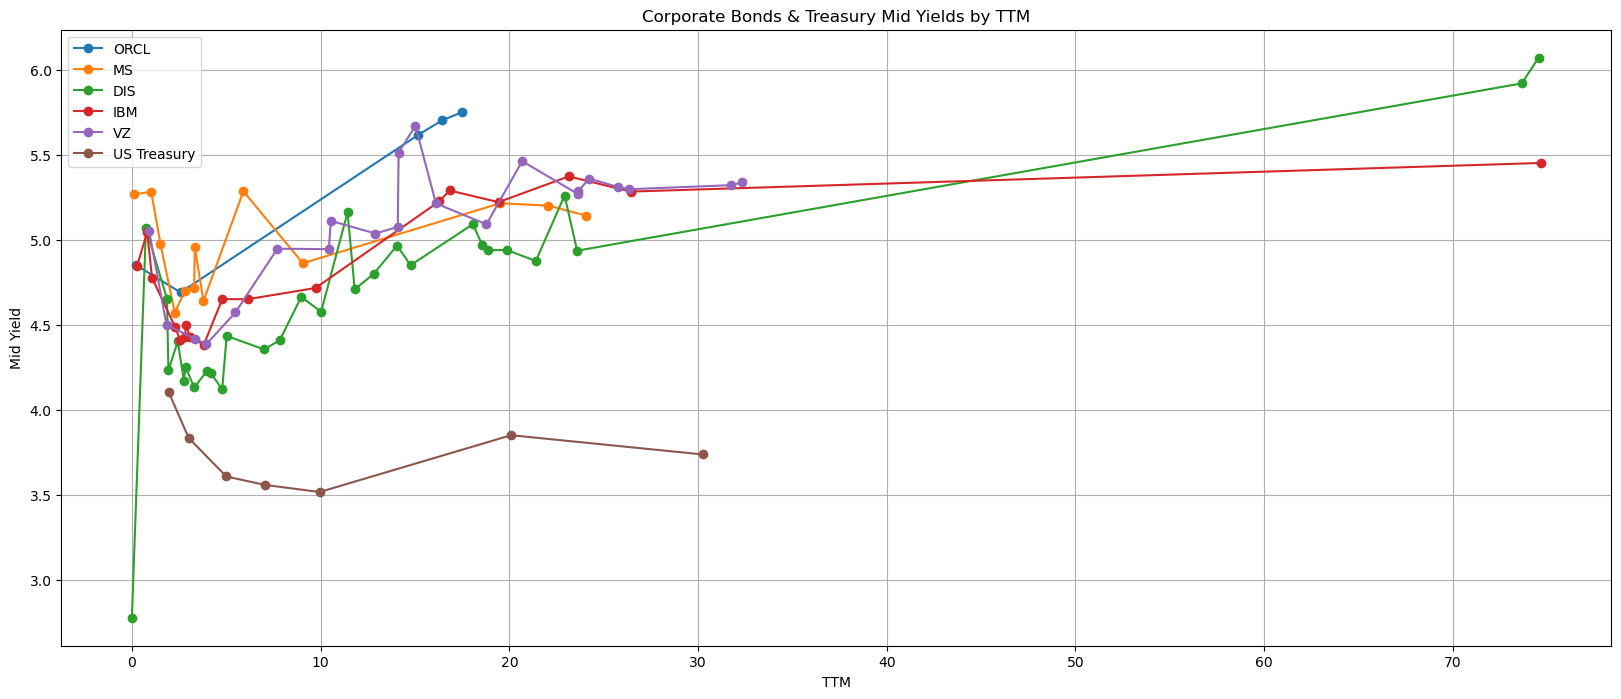

In [28]:
plot_mid_yield_ttm2(df_corporate, df_treasury_run)

According to the above plot, corporate bond yields are typically higher than US Treasury yields at every maturity. This is because corporate bonds are generally considered to be riskier than Treasuries, as there is a higher likelihood of default by the issuer.

Corporate bond yields tend to go up as time to maturity gets longer because longer-term bonds are generally perceived to have a higher risk of default than shorter-term bonds. A lot can happen over a long time horizon, and there is more uncertainty about a company's ability to make timely interest and principal payments on longer-term bonds. As a result, investors demand a higher yield to compensate them for the added risk of owning longer-term corporate bonds. Additionally, longer-term bonds are more sensitive to changes in interest rates, which can also impact their yields.

US Treasuries yield curve tends to flatten or even slope downward as time to maturity gets longer because US Treasuries are considered to be risk-free assets, meaning that they are backed by the full faith and credit of the US government. As a result, investors are willing to accept lower yields for longer-term Treasuries because they are more confident in their ability to be paid back. Also, longer-term Treasury yields are heavily influenced by inflation expectations. If investors expect inflation to be low and stable in the future, they will be willing to accept lower yields for longer-term Treasuries.

# Problem 3: Underlying treasury benchmarks and credit spreads

## a. Add underlying benchmark bond mid yields

Use the column 'und_bench_yield' to identify the underlying benchmark bond for each issue.

Add two new columns to the joint corporate bond dataframe:

| und_bench_yield | credit_spread |
|----------|-------|

where 

*  `und_bench_yield` = underlying benchmark bond mid yield and
*  `credit_spread` = issue yield - underlying benchmark bond mid yield.

In [29]:
def find_closest(lst, target):
    
    return min(lst, key=lambda x: abs(x - target))

def add_benchmark(df_corporate_, df_treasury, on_the_run):

    df_corporate = df_corporate_.copy()

    treasury_ttm_list = list(df_treasury['TTM'])
    
    df_benchmark = df_treasury[['TTM','mid_yield']]
    df_benchmark.set_index('TTM',inplace=True)
    dict_benchmark = df_benchmark.to_dict()['mid_yield']

    if on_the_run == False:

        df_corporate['und_bench_yield'] = 0.0
        df_corporate['credit_spread'] = 0.0
    
    else:

        df_corporate['interp_tsy_yield'] = 0.0
        df_corporate['g_spread'] = 0.0

    for i in range(len(df_corporate)):

        corpbond_ttm = df_corporate['TTM'][i]
        treasury_ttm = find_closest(treasury_ttm_list, corpbond_ttm)

        treasury_yield = dict_benchmark[treasury_ttm]

        if on_the_run == False:

            df_corporate['und_bench_yield'][i] = treasury_yield
            df_corporate['credit_spread'][i] = df_corporate['mid_yield'][i] - df_corporate['und_bench_yield'][i]
        
        else:

            df_corporate['interp_tsy_yield'][i] = treasury_yield
            df_corporate['g_spread'][i] = df_corporate['mid_yield'][i] - df_corporate['interp_tsy_yield'][i]

    return df_corporate

In [30]:
df_corporate1 = add_benchmark(df_corporate, df_treasury, on_the_run = False)
df_corporate1

,date,ticker,bid,ask,mid,bid_yield,ask_yield,mid_yield,term,TTM,und_bench_yield,credit_spread
0,2023-04-14,DIS,115.163,115.984,115.574,4.624,4.529,4.5765,13.505556,10.022222,3.5160,1.0605
1,2023-04-14,DIS,112.939,113.586,113.262,4.742,4.674,4.7080,15.283333,11.800000,3.4380,1.2700
2,2023-04-14,DIS,114.645,115.438,115.042,4.838,4.761,4.7995,16.297222,12.813889,3.4380,1.3615
3,2023-04-14,DIS,111.153,112.380,111.767,5.023,4.908,4.9655,17.525000,14.041667,3.4855,1.4800
4,2023-04-14,DIS,118.135,119.168,118.652,4.895,4.805,4.8500,18.244444,14.761111,3.5610,1.2890
...,...,...,...,...,...,...,...,...,...,...,...,...
83,2023-04-14,VZ,96.081,96.791,96.436,4.990,4.899,4.9445,16.233333,10.433333,3.5160,1.4285
84,2023-04-14,VZ,97.932,98.164,98.048,4.567,4.432,4.4995,7.177778,1.827778,4.2090,0.2905
85,2023-04-14,VZ,98.655,99.025,98.840,4.611,4.533,4.5720,10.061111,5.477778,3.6350,0.9370
86,2023-04-14,VZ,95.975,96.327,96.151,5.251,4.846,5.0485,3.044444,0.911111,4.7610,0.2875


## b. Credit spread curve plots

Plot a graph/scatter plot of credit spread curves by TTM (one line per issuer).


In [31]:
def plot_credit_spread(df_corporate1):

    df_corp_orcl1 = df_corporate1.loc[df_corporate1['ticker'] == 'ORCL'].sort_values(by=['TTM']).reset_index(drop=True)
    df_corp_ms1 = df_corporate1.loc[df_corporate1['ticker'] == 'MS'].sort_values(by=['TTM']).reset_index(drop=True)
    df_corp_dis1 = df_corporate1.loc[df_corporate1['ticker'] == 'DIS'].sort_values(by=['TTM']).reset_index(drop=True)
    df_corp_ibm1 = df_corporate1.loc[df_corporate1['ticker'] == 'IBM'].sort_values(by=['TTM']).reset_index(drop=True)
    df_corp_vz1 = df_corporate1.loc[df_corporate1['ticker'] == 'VZ'].sort_values(by=['TTM']).reset_index(drop=True)

    fig, ax = plt.subplots(figsize=(20, 8))
    ax.plot(df_corp_orcl1['TTM'], df_corp_orcl1['credit_spread'], 'o-', label='ORCL')
    ax.plot(df_corp_ms1['TTM'], df_corp_ms1['credit_spread'], 'o-', label='MS')
    ax.plot(df_corp_dis1['TTM'], df_corp_dis1['credit_spread'], 'o-', label='DIS')
    ax.plot(df_corp_ibm1['TTM'], df_corp_ibm1['credit_spread'], 'o-', label='IBM')
    ax.plot(df_corp_vz1['TTM'], df_corp_vz1['credit_spread'], 'o-', label='VZ')

    ax.set_title('Credit Spread Curves by TTM')
    ax.set_xlabel('TTM')
    ax.set_ylabel('Credit Spread')

    ax.legend()
    plt.grid(True)

    plt.show();

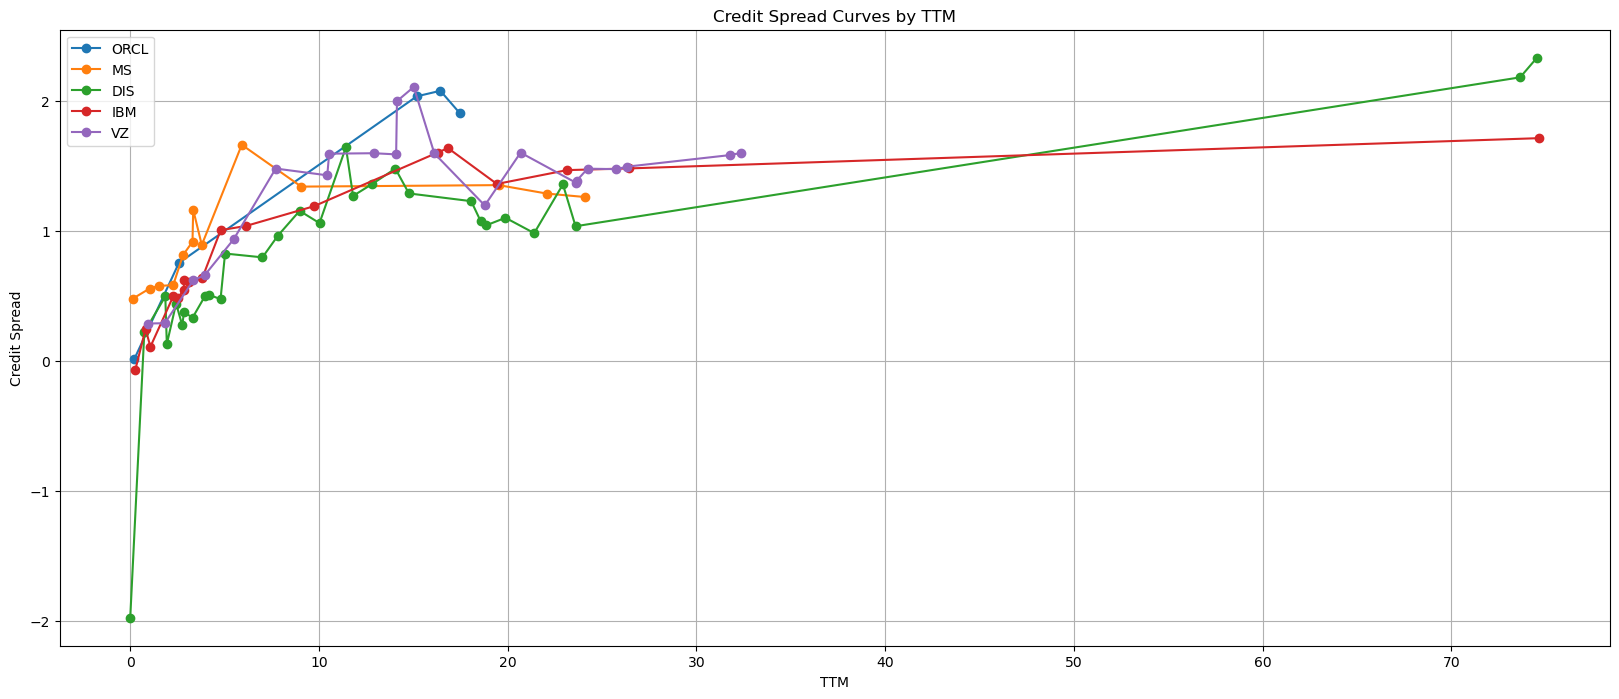

In [32]:
plot_credit_spread(df_corporate1)

## c. Add g-spreads

Add two new columns to the joint corporate bond dataframe:

| interp_tsy_yield | g_spread |
|----------|-------|

where 

*  `interp_tsy_yield` = interpolated treasury yield (using on-the-run treasuries only), matching the issue maturity
*  `g_spread` = issue yield - interp_tsy_yield.

In [33]:
df_corporate2 = add_benchmark(df_corporate, df_treasury_run, on_the_run = True)
df_corporate2

,date,ticker,bid,ask,mid,bid_yield,ask_yield,mid_yield,term,TTM,interp_tsy_yield,g_spread
0,2023-04-14,DIS,115.163,115.984,115.574,4.624,4.529,4.5765,13.505556,10.022222,3.5160,1.0605
1,2023-04-14,DIS,112.939,113.586,113.262,4.742,4.674,4.7080,15.283333,11.800000,3.5160,1.1920
2,2023-04-14,DIS,114.645,115.438,115.042,4.838,4.761,4.7995,16.297222,12.813889,3.5160,1.2835
3,2023-04-14,DIS,111.153,112.380,111.767,5.023,4.908,4.9655,17.525000,14.041667,3.5160,1.4495
4,2023-04-14,DIS,118.135,119.168,118.652,4.895,4.805,4.8500,18.244444,14.761111,3.5160,1.3340
...,...,...,...,...,...,...,...,...,...,...,...,...
83,2023-04-14,VZ,96.081,96.791,96.436,4.990,4.899,4.9445,16.233333,10.433333,3.5160,1.4285
84,2023-04-14,VZ,97.932,98.164,98.048,4.567,4.432,4.4995,7.177778,1.827778,4.1020,0.3975
85,2023-04-14,VZ,98.655,99.025,98.840,4.611,4.533,4.5720,10.061111,5.477778,3.6075,0.9645
86,2023-04-14,VZ,95.975,96.327,96.151,5.251,4.846,5.0485,3.044444,0.911111,4.1020,0.9465


## d. G-spread curve plots

Plot a graph/scatter plot of g-spread curves by TTM (one line per issuer).


In [34]:
def plot_g_spread(df_corporate2):

    df_corp_orcl2 = df_corporate2.loc[df_corporate2['ticker'] == 'ORCL'].sort_values(by=['TTM']).reset_index(drop=True)
    df_corp_ms2 = df_corporate2.loc[df_corporate2['ticker'] == 'MS'].sort_values(by=['TTM']).reset_index(drop=True)
    df_corp_dis2 = df_corporate2.loc[df_corporate2['ticker'] == 'DIS'].sort_values(by=['TTM']).reset_index(drop=True)
    df_corp_ibm2 = df_corporate2.loc[df_corporate2['ticker'] == 'IBM'].sort_values(by=['TTM']).reset_index(drop=True)
    df_corp_vz2 = df_corporate2.loc[df_corporate2['ticker'] == 'VZ'].sort_values(by=['TTM']).reset_index(drop=True)

    fig, ax = plt.subplots(figsize=(20, 8))
    ax.plot(df_corp_orcl2['TTM'], df_corp_orcl2['g_spread'], 'o-', label='ORCL')
    ax.plot(df_corp_ms2['TTM'], df_corp_ms2['g_spread'], 'o-', label='MS')
    ax.plot(df_corp_dis2['TTM'], df_corp_dis2['g_spread'], 'o-', label='DIS')
    ax.plot(df_corp_ibm2['TTM'], df_corp_ibm2['g_spread'], 'o-', label='IBM')
    ax.plot(df_corp_vz2['TTM'], df_corp_vz2['g_spread'], 'o-', label='VZ')

    ax.set_title('G-Spread Curves by TTM')
    ax.set_xlabel('TTM')
    ax.set_ylabel('G-Spread')

    ax.legend()
    plt.grid(True)

    plt.show();

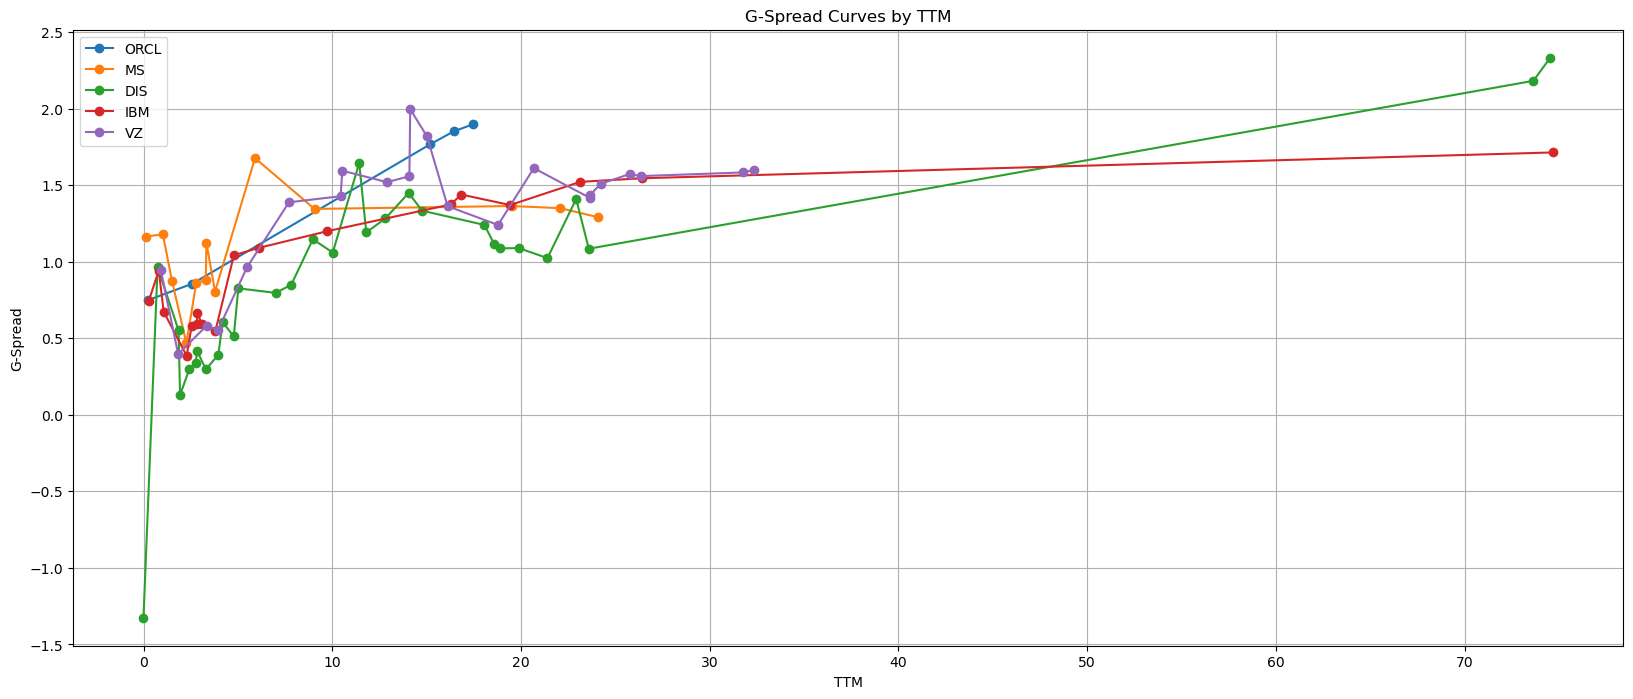

In [35]:
plot_g_spread(df_corporate2)

In Problem 1, I explored symbology for US treasury and corporate bonds. According to the historical time series of US treasury coupons, the overall level of coupons has been on the rise in the last two years. One possible reason is the increase in inflation. Higher inflation expectations can lead to higher interest rates, and higher interest rates can result in higher coupon payments. Another possible reason is the rising demand for US treasury securities.

The mid yield curves by time-to-maturity for corporate bonds and on-the-run US treasury, which were plotted in Problem 2, are in accordance with the yield curve examples on page 59 of Session1 lecture notes. The discovery shows that corporate bond yields tend to increase as time to maturity gets longer, which is due to the increased risk associated with holding longer-term bonds issued by corporate entities. Investors demand a higher return on their investment to compensate for the higher risk. On the other hand, US treasury yield curve tends to flatten or even slope downward as time to maturity gets longer due to a combination of factors such as inflation expectations, the demand for safe-haven assets, and central bank policies. Longer-term treasury bonds tend to be less sensitive to changes in interest rates and inflation expectations, which can lead to a flatter or even downward-sloping yield curve.

Credit spread reflects the additional compensation investors demand for taking on the additional risk of investing in a corporate bond compared to a risk-free treasury security. Investors often use interpolated treasury yields, which are derived from the yields of treasuries with nearby maturities, to calculate the spread between corporate bond yields and treasury yields. The difference between the corporate bond yield and the interpolated treasury yield is known as the g-spread. Both credit spread and g-spread tend to increase as the time to maturity of the bond increases. This is due to the increased uncertainty and risk associated with longer-term bonds. Investors demand higher returns to compensate for this increased risk. The plots of credit spreads and g-spreads by time-to-maturity for corporate bonds, as presented in Problem 3, align with the example presented on page 61 of the Session 1 lecture notes. 

We observed that the g-spreads were higher than the credit spreads for most of the corporate bonds across different maturities. One possible reason for this could be that the interpolated treasury yield is a better representation of the risk-free rate compared to the on-the-run US treasury yield. Another possible reason is that the market perceives corporate bonds to have a higher default risk than US treasuries, and therefore requires a higher premium for holding them.

# Problem 4: Explore the QuantLib introductory notebook

Try to link concepts discussed in Session 1 to various sections in the notebook. 

Address open questions by consulting the library documentation.

Going forward, we will be using QuantLib for curve calibration (US Treasury + SOFR), as well as pricing and risk of various cash and synthetic credit instruments.

In section 2, we constructed a semi-annual fixed rate cashflow schedule object. A semi-annual fixed rate cashflow schedule is a payment plan in which an investor receives fixed payments at regular intervals of six months. The cashflow schedule is predetermined and follows a set pattern, with each payment being a fixed percentage of the face value of the bond. This type of schedule allows investors to calculate the yield-to-maturity and duration of the bond, which are important factors in bond valuation and pricing.

In section 3, we constructed flat yield curve and discount curve. A flat yield curve can occur when there is no clear consensus on the future direction of the economy or when central banks have kept interest rates low for an extended period. The shape of the discount curve can change depending on various market factors such as changes in interest rates, inflation expectations, and market liquidity.

In section 4, we investigated bond cashflows, which refers to the periodic payments of principal and interest that a bondholder receives over the life of a bond. The principal payment is typically made at the maturity date of the bond, while the interest payments are made periodically throughout the life of the bond. 

In section 5, clean and dirty prices of bonds were compared. The clean price of a bond is the present value of all its future cash flows, excluding any accrued interest. It is also known as the quoted price. The dirty price of a bond is the sum of the clean price and the accrued interest. Accrued interest is the interest that has accumulated on the bond since the last coupon payment. The dirty price represents the actual price that an investor pays for a bond, including any accrued interest.

In section 7 and 8, we calculated yield to price and price to yield conversions. Yield to price conversions and price to yield conversions are methods used to determine the yield or price of a bond. Yield to price conversions involve calculating the yield of a bond given its price, while price to yield conversions involve calculating the price of a bond given its yield.